#### Importing data

In [1]:
import pandas as pd

viscosity_df = pd.read_excel('data/viscosity_data.xlsx') 
viscosity_df.head()

,Shear Rate,Viscosity,Particle Size,Temperature
0,0.100,160000.0,100,20
1,0.120,138000.0,100,20
2,0.143,119000.0,100,20
3,0.172,103000.0,100,20
4,0.205,89444.0,100,20


In [4]:
viscosity_df.shape

(513, 4)

#### Checking for duplicates and removing if any and similar steps for null/nan/inf values

In [2]:
viscosity_df.duplicated().sum()

15

In [7]:
viscosity_df.drop_duplicates(inplace=True)

print("updated_shape_of_df: ", viscosity_df.shape)

updated_shape_of_df:  (498, 4)


In [8]:
viscosity_df.isnull().sum()

Shear Rate       0
Viscosity        0
Particle Size    0
Temperature      0
dtype: int64

In [9]:
import numpy as np
np.isinf(viscosity_df).sum()

Shear Rate       0
Viscosity        0
Particle Size    0
Temperature      0
dtype: int64

#### Looking into description of data

In [10]:
viscosity_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 512
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Shear Rate     498 non-null    float64
 1   Viscosity      498 non-null    float64
 2   Particle Size  498 non-null    int64  
 3   Temperature    498 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 19.5 KB


In [11]:
viscosity_df.describe()

,Shear Rate,Viscosity,Particle Size,Temperature
count,498.000000,498.000000,498.000000,498.000000
mean,219.482353,14574.947786,297.590361,29.879518
std,437.836192,25472.174109,162.952564,8.147628
min,0.100000,0.067272,100.000000,20.000000
25%,1.240000,1806.650000,100.000000,20.000000
50%,15.500000,5216.750000,300.000000,30.000000
75%,192.000000,15959.250000,500.000000,40.000000
max,2010.000000,189000.000000,500.000000,40.000000


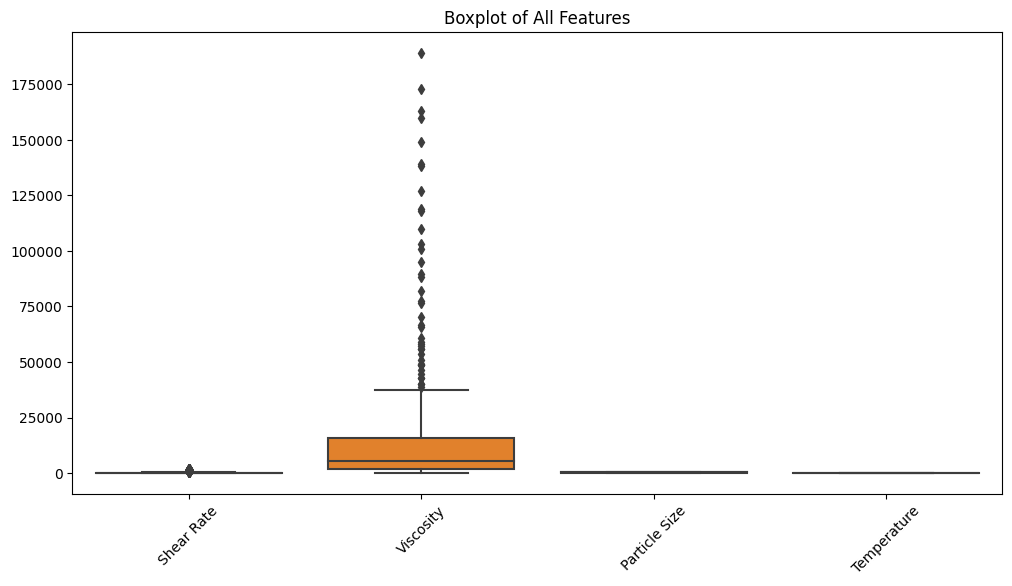

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=viscosity_df)
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.show()

From this plot it can be seen that viscosity has high number of outliers, shear rate has a few and, particle size and temperature have almost none. Next we do outlier removal using IQR.

In [14]:
def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

columns_to_check = ['Shear Rate', 'Viscosity']
viscosity_df_cleaned = remove_outliers_iqr(viscosity_df, columns_to_check)

print(f"Original shape: {viscosity_df.shape}")
print(f"After outlier removal: {viscosity_df_cleaned.shape}")

Original shape: (498, 4)
After outlier removal: (389, 4)


#### Scaling the data and moving ahead with EDA visualisations

In [15]:
from sklearn.preprocessing import StandardScaler

X = viscosity_df_cleaned[['Shear Rate', 'Temperature', 'Particle Size']]
y = viscosity_df_cleaned['Viscosity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

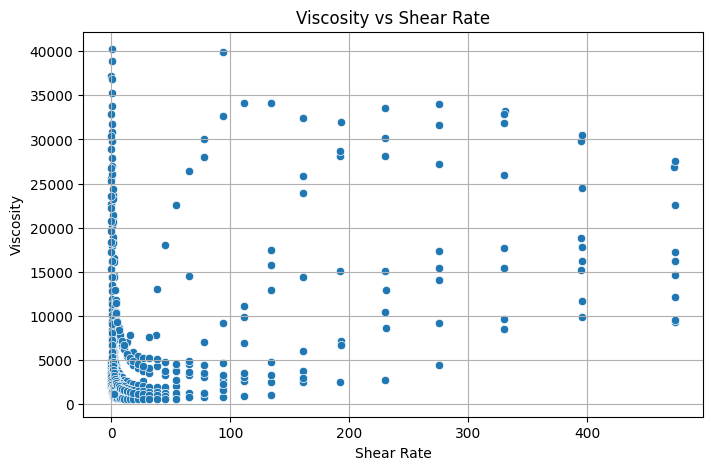

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=viscosity_df_cleaned['Shear Rate'], y=viscosity_df_cleaned['Viscosity'])
plt.title('Viscosity vs Shear Rate')
plt.xlabel('Shear Rate')
plt.ylabel('Viscosity')
plt.grid(True)
plt.show()

__Viscosity vs Shear Rate:__ Shows non-Newtonian shear-thinning behavior – viscosity decreases as shear rate increases.

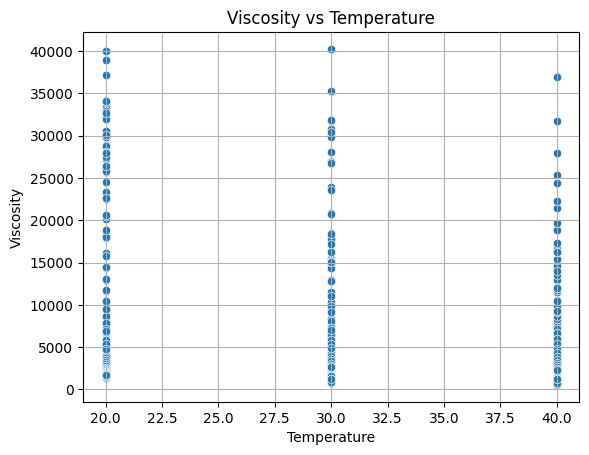

In [17]:
sns.scatterplot(x=viscosity_df_cleaned['Temperature'], y=viscosity_df_cleaned['Viscosity'])
plt.title('Viscosity vs Temperature')
plt.grid(True)
plt.show()

__Viscosity vs Temperature:__ There's a downward trend – as temperature increases, viscosity tends to decrease. That's physically expected behavior for many fluids.

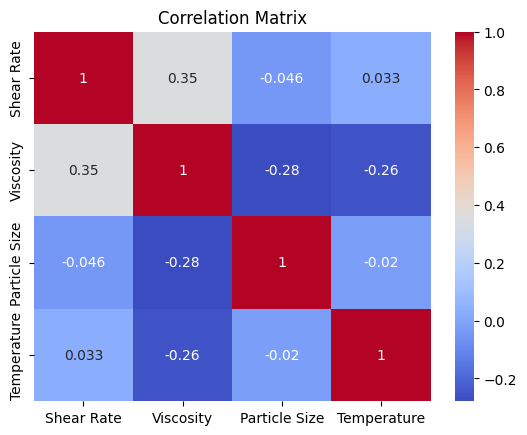

In [19]:
sns.heatmap(viscosity_df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()